# CREDIT RISK ASSESSMENT AND LOAN PREDICTION
---

*GROUP 3*
1. Grace Gitau
2. Kelvin Letimalo
3. Grace Wacheke
4. David Chege
5. Faith Wanjala

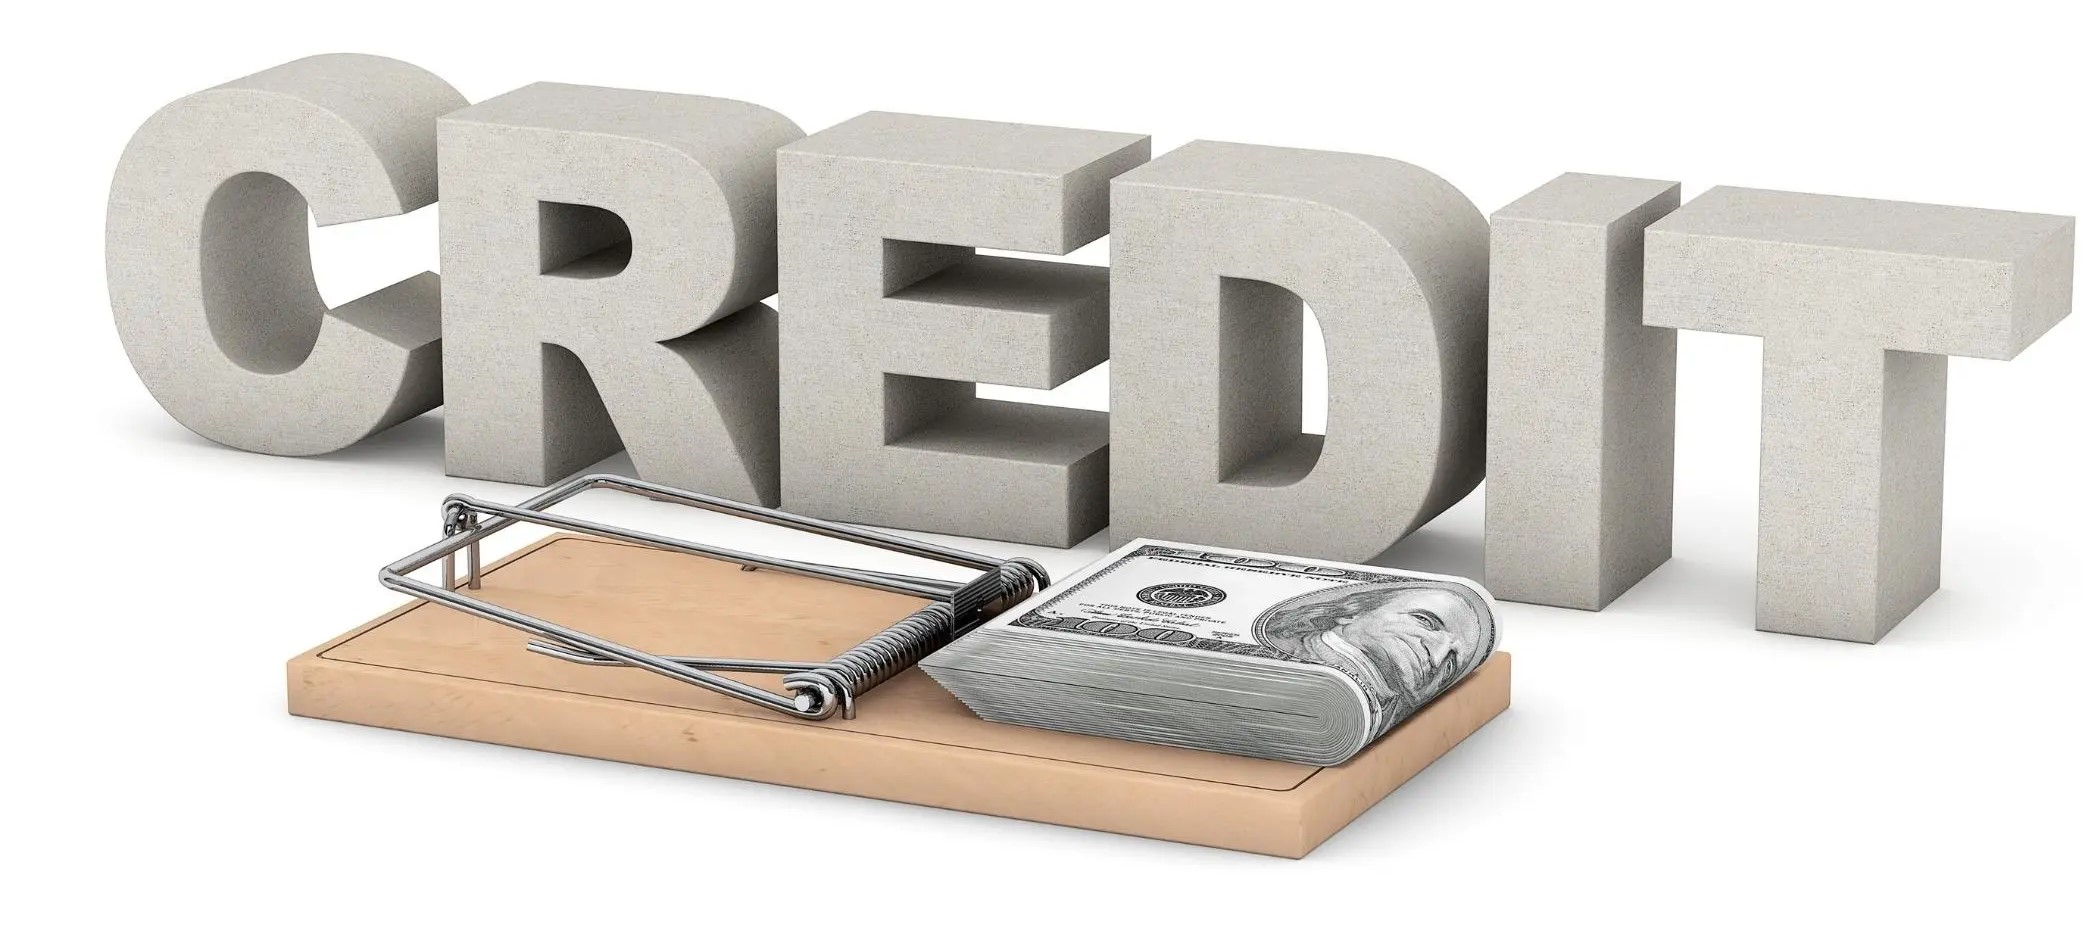

# Project Summary
This project addresses critical challenges in financial lending by analyzing a loan dataset to predict credit risk and loan amounts. The dataset, sourced from Kaggle, contains 32,581 observations across 12 variables, including borrower demographics, financial indicators, and loan characteristics.

Data preparation included handling missing values, removing duplicates, and addressing outliers in income and employment length. We used pandas for data manipulation and scikit-learn for preprocessing, applying StandardScaler for feature scaling and LabelEncoder for categorical variables.

For credit risk prediction, we tested multiple models such as Logistic Regression, Decision Trees, Random Forest, K-Nearest Neighbors, Gradient Boosting, and XGBoost. XGBoost proved most effective, achieving 93.8% accuracy and an F1 score of 0.842. Loan amount prediction employed Linear Regression, XGBoost, and Artificial Neural Networks, with XGBoost again leading with an R² of 0.99 and an RMSE of 498.28.

Model performance was assessed using an 80-20 train-test split, with metrics such as accuracy, precision, and F1 score for classification, and RMSE, MSE, and R² for regression. SHAP and LIME were applied to enhance interpretability, identifying income, loan-to-income ratio, and loan intent as key predictors.

The project was deployed using Streamlit, offering an interactive interface for real-time credit risk and loan amount predictions. This deployment enhances accessibility, providing valuable tools for lenders to make informed decisions.

# Business Understanding
Accurate credit risk assessment is crucial for financial institutions to ensure responsible lending, protect against financial losses, and maintain economic stability. Misjudging an applicant's risk can result in bad loans, while inaccurate loan amount predictions may either overburden customers or limit their potential.

Credit Risk Classification helps categorize loan applicants based on their creditworthiness, guiding decisions on loan approvals and interest rates. 
Loan Amount Prediction estimates the appropriate loan amount by analyzing financial indicators such as income, employment stability, and credit history. This ensures borrowers receive loans aligned with their ability to repay, reducing default risk. By leveraging machine learning, this project aids in balancing credit access with maintaining a healthy loan portfolio.

# Data Understanding
The [dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset) consists of 32,581 observations of 12 variables. The definitions are as follows:
 - person_age: The age of the borrower when securing the loan.
 - person_income: The borrower’s annual earnings at the time of the loan.
 - person_home_ownership: Type of home ownership.
 - person_emp_length: The amount of time in years that the borrower is employed.
 - loan_intent: Loan purpose.
 - loan_grade: Classification system based on credit history, collateral quality, and likelihood of repayment.
    - A: The borrower has a high creditworthiness, indicating low risk.
    - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    - C: The borrower’s creditworthiness is moderate.
    - D: The borrower is considered to have higher risk compared to previous grades.
    - E: The borrower’s creditworthiness is lower, indicating a higher risk.
    - F: The borrower poses a significant credit risk.
    - G: The borrower’s creditworthiness is the lowest, signifying the highest risk.
 - loan_amnt: Total amount of the loan.
 - loan_int_rate: Interest rate of the loan.
 - loan_status: Dummy variable indicating default (1) or non-default (0).
 A default occurs when a borrower is unable to make timely payments, misses payments, or avoids or stops making payments on interest or principal owed.
 - loan_percent_income: Ratio between the loan amount and the annual income.
 - cb_person_cred_hist_length: The number of years of personal history since the first loan taken.
 - cb_person_default_on_file: Indicates if the person has previously defaulted.


## Objectives
1. Credit Risk Classification: Categorizing loan applicants based on their creditworthiness to make informed decisions about loan approvals and interest rates.
2. Loan Amount Prediction: Predicting suitable loan amounts for approved applicants, balancing their financial needs with the risk of default.

# 1. Data Preparation & Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
credit_risk  = pd.read_csv('credit_risk_dataset.csv')
credit_risk .head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Data exploration to understand the overview of the dataset; structure and completeness of the data.
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
# Summary statistics to get insights into the distribution of each feature.
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
# Describing the dataset object (categorical) features
credit_risk.describe(include='O')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


The summary statistics reveal the distribution patterns of each numerical feature in the dataset. Of particular note are the maximum age (144 years) and maximum employment length (123 years), which appear unrealistic and suggest the presence of outliers. 

Additionally, we observe missing values in the employment length and loan interest rate columns, issues that will need to be addressed in our data preprocessing stage.

# 2. Data Preprocessing

In [6]:
# Checking for duplicated values
credit_risk.duplicated().sum()

165

In [7]:
# Remove duplicates ensuring each entry is unique
credit_risk = credit_risk.drop_duplicates()

In [8]:
# Checking for null values
credit_risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
# drop values that are null to ensure completeness of our dataset for analysis
credit_risk.dropna(axis=0,inplace=True)

In [10]:
# Checking unique values in each column to understand the cardinality of our features
credit_risk.nunique()

person_age                      57
person_income                 3835
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      728
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

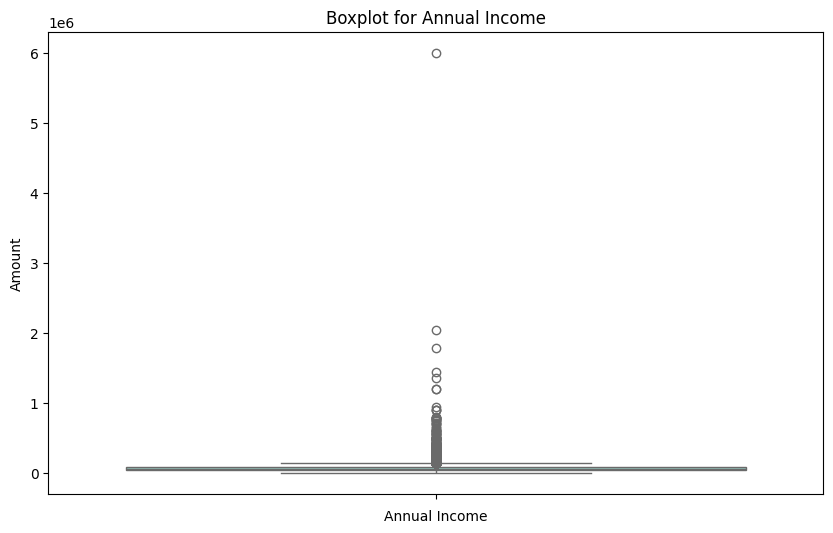

In [11]:
# Boxplot to visualize the distribution of annual income.
# Checking for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y='person_income', data=credit_risk, palette='Set3')
plt.title('Boxplot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Amount')
plt.show()

The boxplot visualization of annual income reveals potential outliers, particularly in the upper range. These high-income values, which extend beyond the 95th percentile, warrant closer examination to determine their impact on our analysis and whether they represent genuine data points or potential errors.

In [12]:
# Handling outliers
# Checking high incomes
high_income = credit_risk[credit_risk['person_income'] > 1000000]
high_income['person_income']

17833    1200000
29119    1200000
30049    2039784
31922    1362000
31924    1440000
32297    6000000
32497    1782000
Name: person_income, dtype: int64

Upon checking the all the attributes above, we shall not drop any observations in the person_income variable although there is an outlier since the values make sense.

### Feature Engineering

In [13]:
# Data transformation for analysis

# Replacing invalid age values
credit_risk = credit_risk[credit_risk['person_age'] <= 70]

credit_risk = credit_risk.drop(credit_risk[credit_risk['person_emp_length'] > 60].index, axis=0)

# Create a copy of the original dataset for EDA to avoid introducing noise or complexity to your models
credit_risk_eda = credit_risk.copy()

# Grouping age
credit_risk_eda['age_group'] = pd.cut(credit_risk_eda['person_age'], bins=[20, 30, 40, 50, 60, 70], 
                                  labels=['21-30', '31-40', '41-50', '51-60', '61-70'])

# Grouping income 
credit_risk_eda['income_group'] = pd.cut(credit_risk_eda['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

credit_risk_eda['loan_amount_group'] = pd.cut(credit_risk_eda['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])


# 3. Exploratory Data Analysis (EDA)

### Univariate analysis

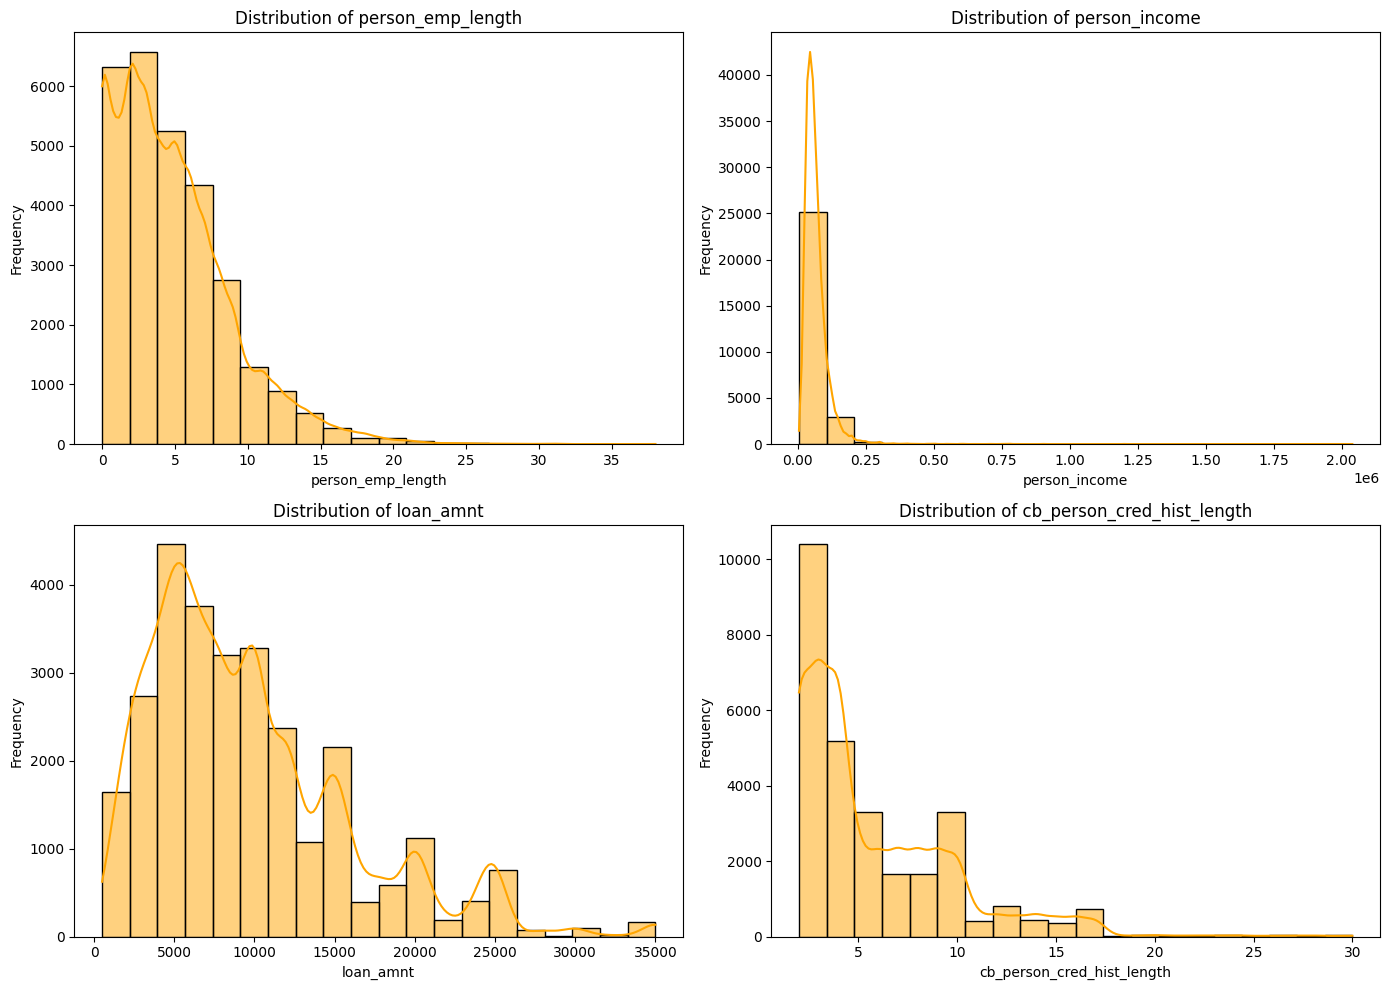

In [14]:
# Exploratory Data Analysis

# List of numerical columns
num_cols = ['person_emp_length', 'person_income', 'loan_amnt', 'cb_person_cred_hist_length']

# Setting the figure size
plt.figure(figsize=(14, 10))

# Creating subplots for each numerical feature
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    
    # Plotting the distribution of each column
    sns.histplot(credit_risk_eda[col], bins=20, kde=True, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


The distribution of numerical features; employment experience, income, loan amount, and credit history are positively skewed, meaning that most individuals in the dataset have relatively lower values for these variables.

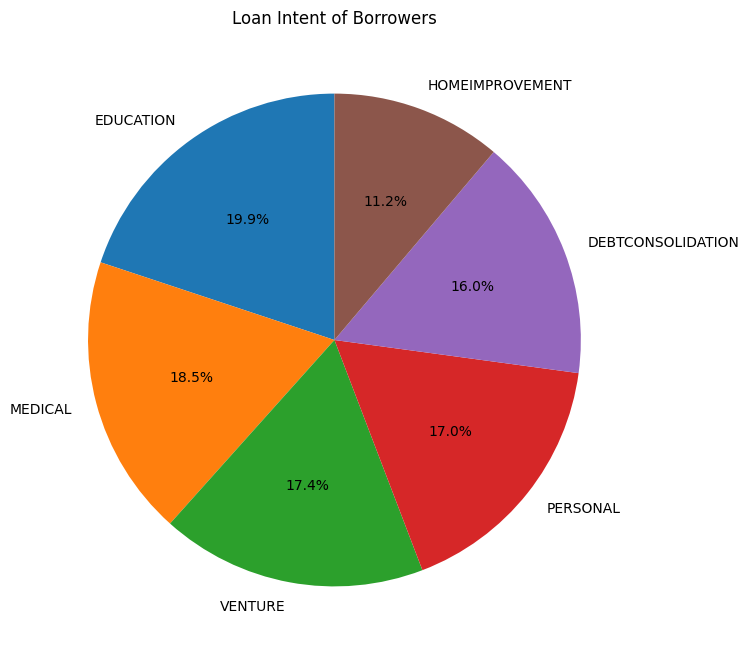

In [15]:
# Loan Intent
plt.figure(figsize=(8, 8))
loan_intent_counts = credit_risk_eda['loan_intent'].value_counts()
plt.pie(loan_intent_counts, labels=loan_intent_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Intent of Borrowers')
plt.show()

From the Loan Intention of Borrower pie chart above, it outlines the distribution of borrowers taking out loans for various purposes. It shows that educational purposes represent the highest percentage at 19.86%. This suggests that a significant portion of borrowers are investing in their education, possibly to further their careers or pursue higher levels of education.On the other hand, home improvement purposes represent the lowest percentage at 11.08%, indicating a smaller but still notable portion are investing in renovating or upgrading their homes.

The majority of loans are intended for educational purposes, which may reflect the growing importance of educational financing.

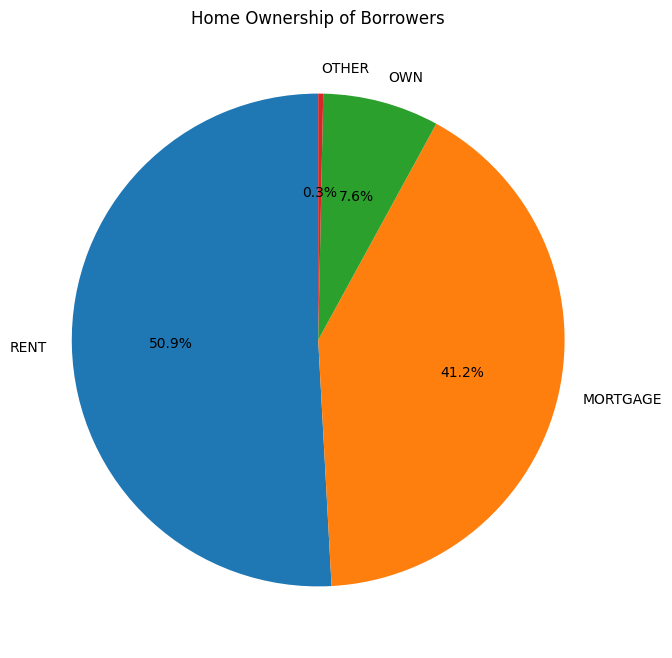

In [16]:
# Home Ownership
plt.figure(figsize=(8, 8))
home_ownership_counts = credit_risk_eda['person_home_ownership'].value_counts()
plt.pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Home Ownership of Borrowers')
plt.show()

From the Home Ownership of Borrower pie chart above, it shows that renting is the most popular choice for borrower homeownership, comprising 50.7% of the dataset, followed closely by mortgage holders at 41.3%. Conversely, the “others” category constitutes the smallest portion at 0.3%. The “others” category likely includes borrowers with unconventional housing arrangements, such as living with family or in alternative housing situations. In conclusion, most borrower who secure loans do not own their house.

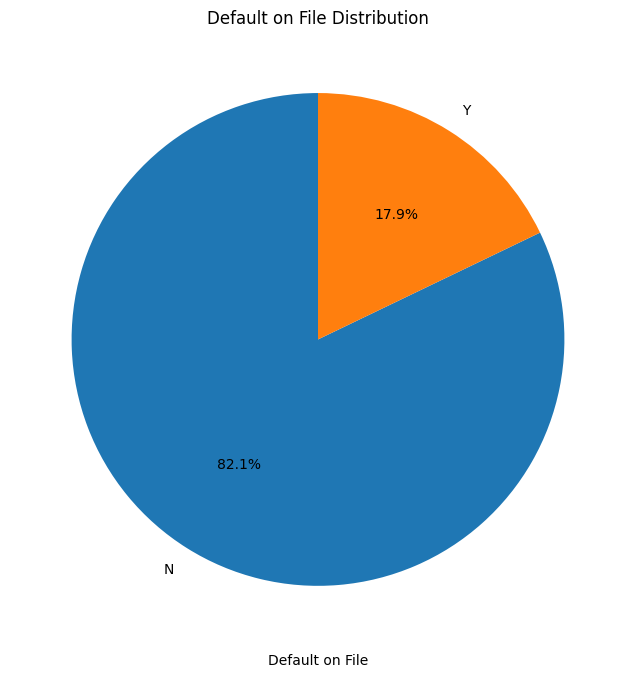

In [17]:
# Default Status on File Distribution
plt.figure(figsize=(8, 8))
default_on_file_counts = credit_risk_eda['cb_person_default_on_file'].value_counts()
plt.pie(default_on_file_counts, labels=default_on_file_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Default on File Distribution')
plt.xlabel('Default on File')
plt.show()

From the graph above, it illustrates that 82% of borrowers having a history of defaults on their loans, suggesting that there is a prevalent trend of financial difficulties among borrowers. Conversely, 18% of borrowers stand out for their clean repayment records, indicating a minority who have managed to navigate their financial obligations successfully.

### Bivariate Analysis

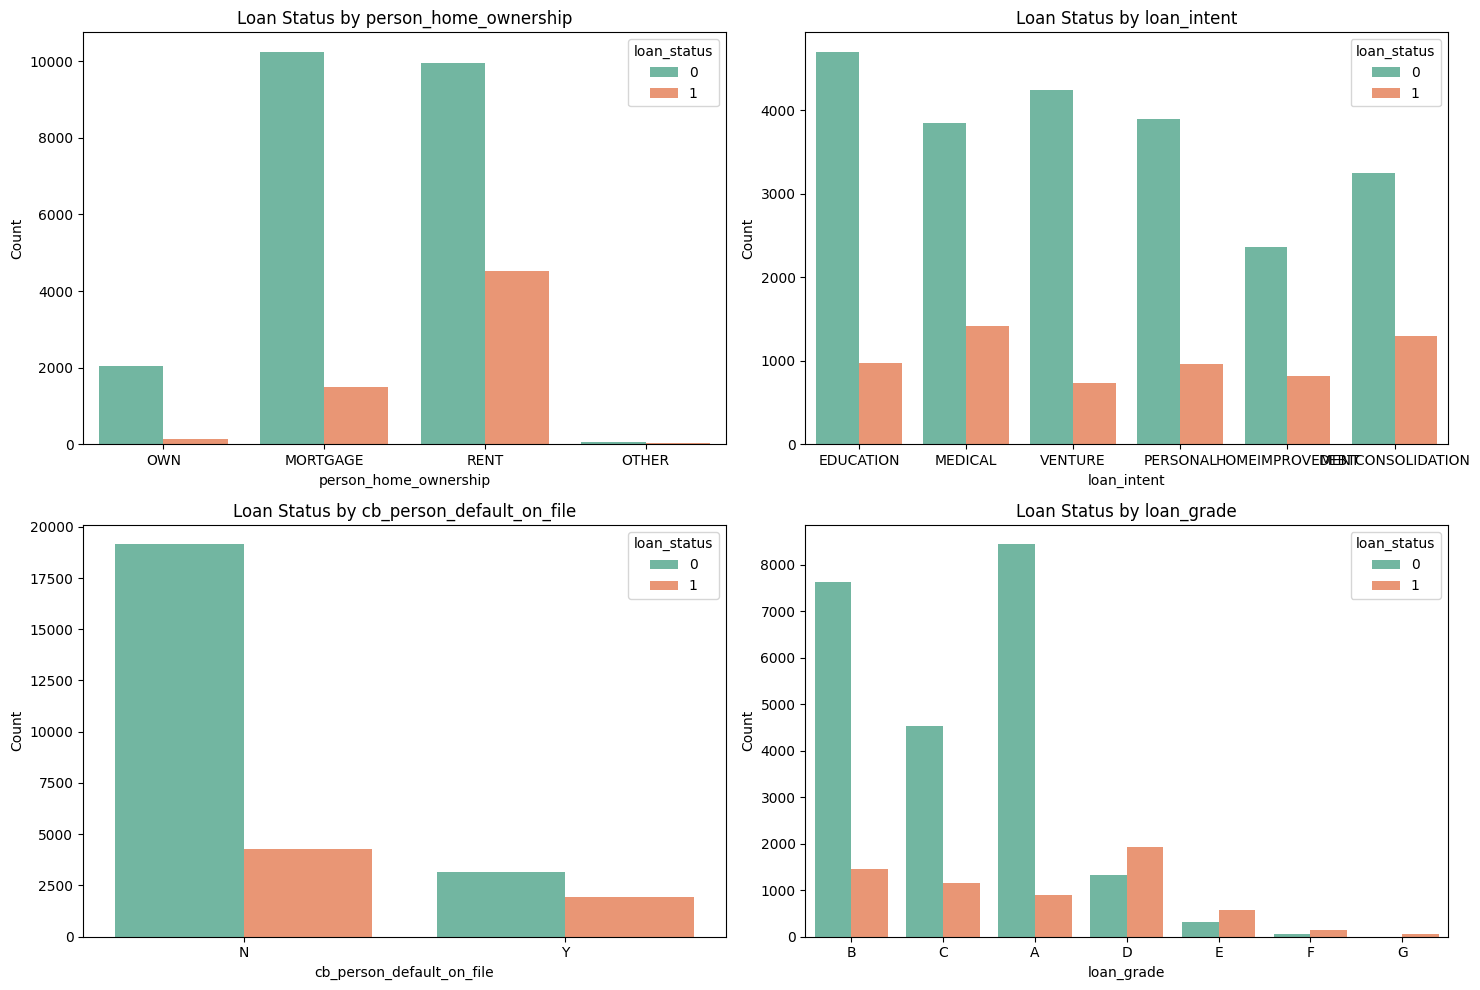

In [18]:
# Bivariate Analysis - Default Status across Demographics
plt.figure(figsize=(15, 10))

# Creating subplots for each demographic feature
features = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, hue='loan_status', data=credit_risk_eda, palette='Set2')
    plt.title(f'Loan Status by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

The data analysis for the above graphs reveals several interesting trends regarding loan statuses across different borrower demographics and loan characteristics. Borrowers with home ownership of rent and securing loans for education purposes exhibit the highest non-default loan status indicating successful repayment and adherence to agreed-upon terms. Additionally, borrowers with no default history maintain the highest non-default loan status further emphasizing the correlation between past repayment performance and current loan status. Notably, loans graded as Grade A also correspond to the highest non-default loan status, indicating that loans classified under this grade are associated with lower default risk and higher levels of successful repayment. These findings underscore the importance of factors such as homeownership status, loan purpose, credit history, and loan grading in determining borrower loan statuses and repayment outcomes.

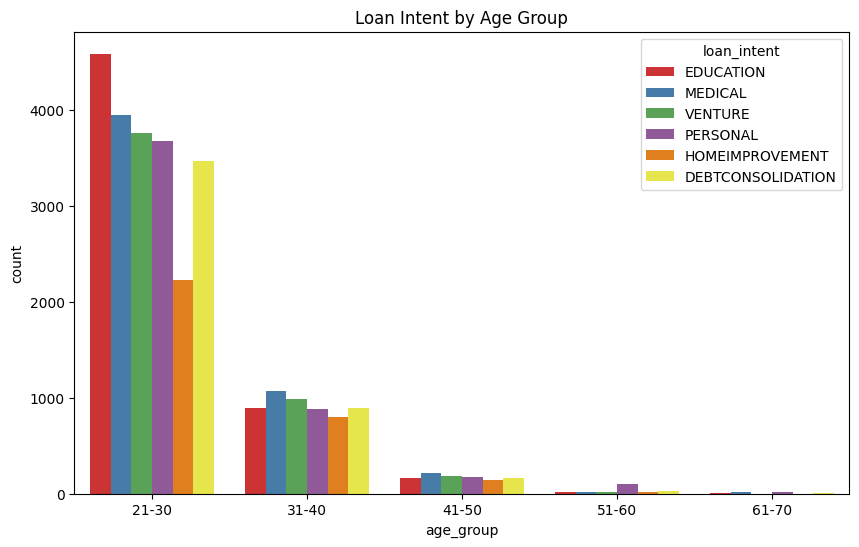

In [19]:
# Barplot for Loan Intent and Loan Status by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='loan_intent', data=credit_risk_eda, palette='Set1')
plt.title('Loan Intent by Age Group')
plt.show()

The graph above shows an insight into the borrowing patterns of different age groups and the reasons behind their loan acquisitions. Borrowers aged 21-30 emerge as the highest demographic securing loans, with education being the predominant reason and home improvement ranks lowest. This suggests a focus on investing in education and potentially early career development among younger borrowers. Next, it demonstrated that borrowers aged 31-40 and 41-50 has medical reasons being the main reasons, indicating a shift towards addressing healthcare needs or concerns in this age range. For borrowers aged 51-60 and 61-70, personal reasons become the primary motivator for securing loans, highlighting a diverse range of borrower financial needs or aspirations in these older age groups. These findings underscore the importance of understanding demographic-specific borrowing behaviors and tailoring financial products and services to meet the evolving needs of different age cohorts.

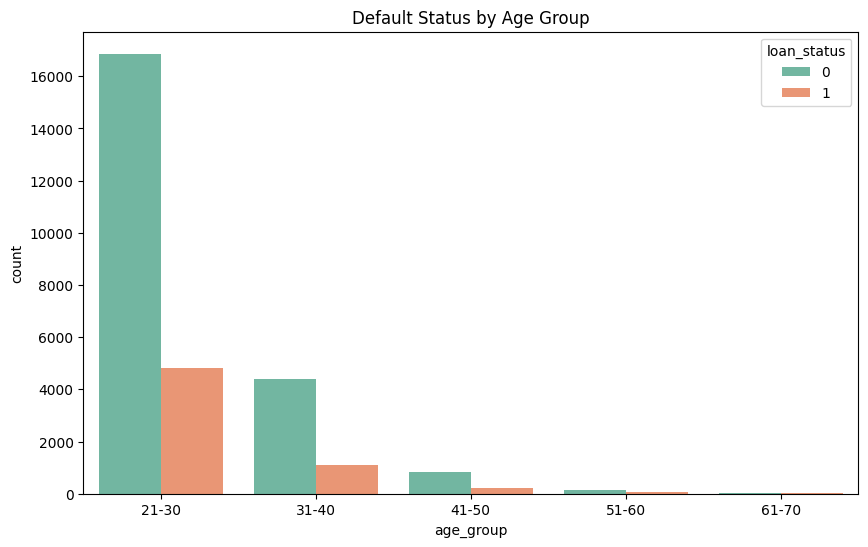

In [20]:
# Barplot for Loan Intent and Loan Status by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='loan_status', data=credit_risk_eda, palette='Set2')
plt.title('Default Status by Age Group')
plt.show()

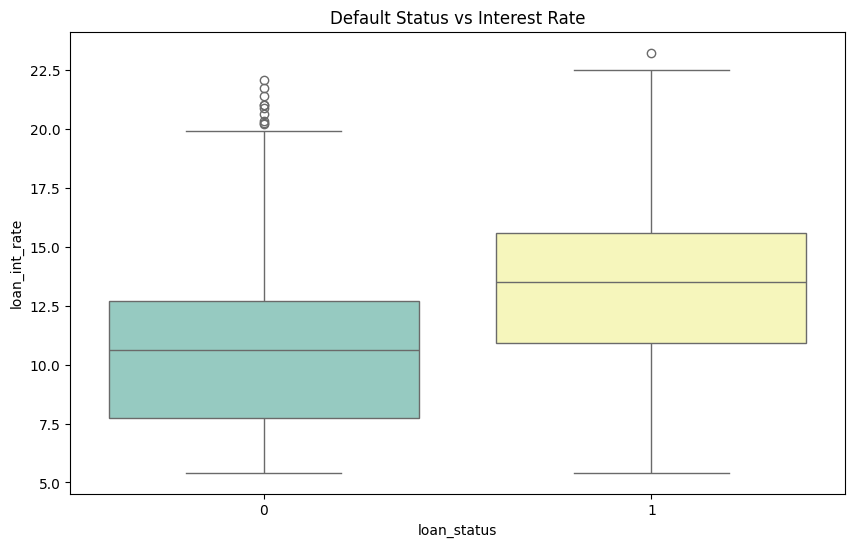

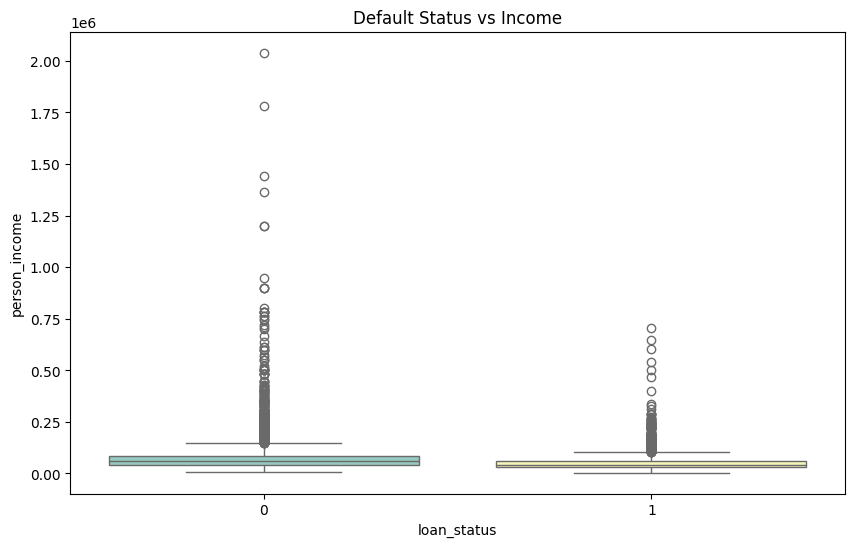

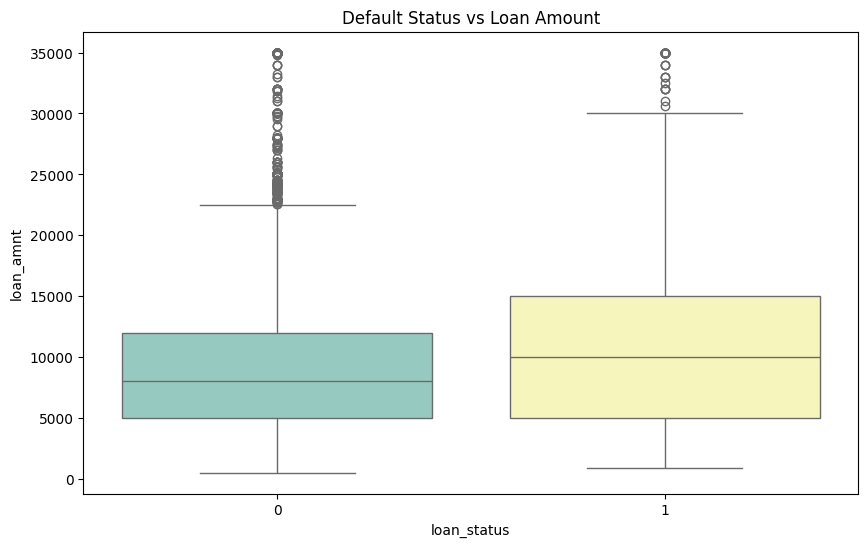

In [21]:
# Boxplots for Default Status vs Interest Rate, Income, and Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_int_rate', data=credit_risk_eda, palette='Set3')
plt.title('Default Status vs Interest Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_income', data=credit_risk_eda, palette='Set3')
plt.title('Default Status vs Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=credit_risk_eda, palette='Set3')
plt.title('Default Status vs Loan Amount')
plt.show()

The graph above illustrates a comparison of default risk with three variables which are interest rates, yearly income, and loan amount. It shows that higher interest rates, a lower income and higher credit increase the possibility to have a default. This insight underscores the significance of these factors in determining the risk profile of borrowers. Specifically, borrowers facing higher interest rates may struggle with repayment, while those with lower incomes might find it challenging to meet their financial obligations. Additionally, larger loan amounts may increase the burden on borrowers, potentially leading to higher default rates. Understanding these relationships is crucial for financial institution to assess risk effectively and tailor lending practices to mitigate default risks, ultimately promoting financial stability for borrowers.

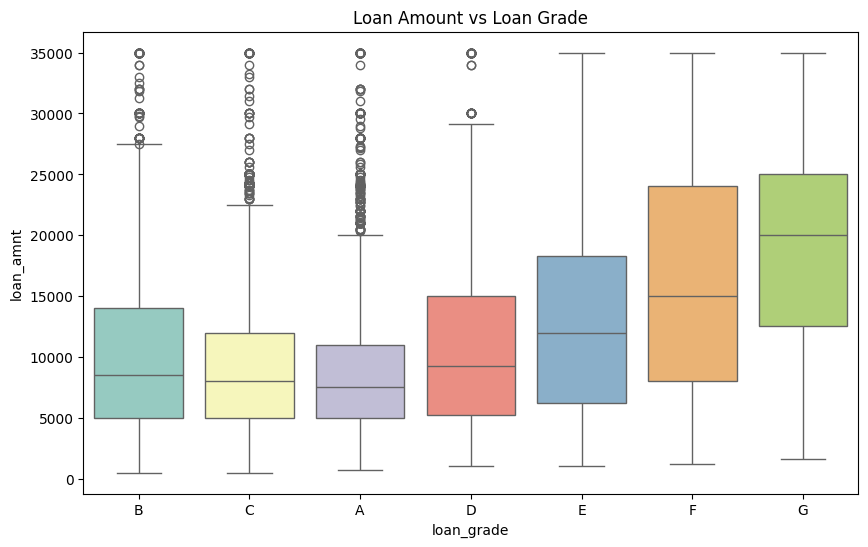

In [22]:
# Loan amount vs loan grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_grade', y='loan_amnt', data=credit_risk_eda, palette='Set3')
plt.title('Loan Amount vs Loan Grade')
plt.show()

### Multivariate Analysis

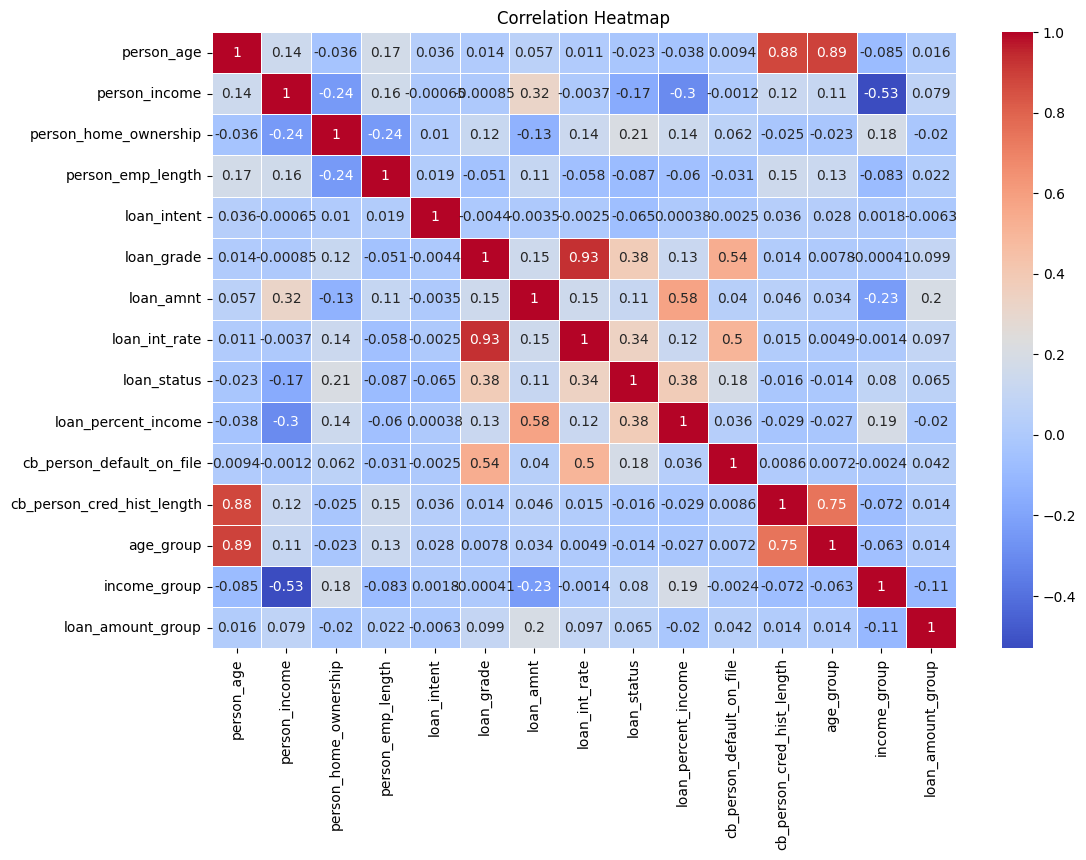

In [23]:
# Correlation Analysis
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for column in credit_risk_eda.select_dtypes(include=['object', 'category']).columns:
    credit_risk_eda[column] = label_encoder.fit_transform(credit_risk_eda[column])

# Create a correlation matrix
correlation_matrix = credit_risk_eda.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap provides valuable insights revealing both strong and moderate correlations. 
Notably, there is a strong positive correlation between `loan_grade` and `loan_int_rate` (0.93), indicating that higher loan grades are associated with higher interest rates, which may suggest riskier loans have steeper costs. 

Similarly, `cb_person_cred_hist_length` is strongly correlated with `person_age` (0.88), implying that older individuals tend to have longer credit histories, potentially affecting their eligibility for loans. 
On the other hand, a moderate positive correlation exists between `person_income` and `loan_amnt` (0.32), indicating that higher income levels are linked to larger loan amounts. 

However, a notable negative correlation between `person_income` and `loan_percent_income` (-0.29) suggests that as income increases, the proportion of income allocated to loans tends to decrease, reflecting more prudent financial behavior among higher earners. 
Additionally, the strong negative correlation between `age_group` and `person_age` (0.89) highlights that older individuals often fall into higher age categories, a finding that could aid in demographic segmentation during risk assessment. 

These correlations serve as critical indicators for model development, guiding feature selection and engineering in our loan prediction analysis, thus enhancing the effectiveness of our credit risk assessment model.

# 4. Modelling

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, classification_report,
                             recall_score, f1_score, mean_squared_error, r2_score, 
                             roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


## 4.1 Credit Risk Classification

In this task, we aim to develop machine learning models to identify and predict the credit risk categories of loan applicants. The credit scoring process for borrowers is crucial for minimizing the credit risk faced by financial institutions, and the outcome of this analysis will inform decisions on whether to accept or reject new loan applications. We will classify and predict risk based on the loan status (0 = paid; 1 = unpaid) using Random Forest and Logistic Regression models. The Random Forest classifier is chosen for its robustness and high accuracy, making it well-suited for complex classification tasks. Conversely, Logistic Regression provides an interpretable framework for binary classification, allowing stakeholders to understand the underlying factors influencing credit risk.

Prepare data for classification:

In [25]:
# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    credit_risk[col] = le.fit_transform(credit_risk[col])


In [26]:
# Splitting the data into features and target variable
X = credit_risk.drop(['loan_status', 'loan_amnt'], axis=1)  # Keep loan_amnt only for regression
y = credit_risk['loan_status']

# Optional: Scaling features (necessary for models like Logistic Regression, SVM, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Baseline Classification Model: Logistic Regression



In [27]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Evaluation for Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Print Logistic Regression Results
print(f"Logistic Regression Accuracy: {acc_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1 Score: {f1_log_reg}, Confusion Matrix: {cm_log_reg}")

Logistic Regression Accuracy: 0.8501228501228502, Precision: 0.7503168567807351, Recall: 0.4739791833466773, F1 Score: 0.5809617271835134, Confusion Matrix: [[4252  197]
 [ 657  592]]


Logistic Regression showed a low accuracy of 85% and struggled with recall. While it was somewhat reliable in predicting paid loans, it fell short in detecting unpaid loans compared to both Random Forest and Decision Tree.

#### Decision Tree

In [28]:
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print Decision Tree Results
print(f"Decision Tree Accuracy: {acc_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}, Confusion Matrix: {cm_dt}")

Decision Tree Accuracy: 0.8815373815373816, Precision: 0.7141791044776119, Recall: 0.7662129703763011, F1 Score: 0.7392815758980301, Confusion Matrix: [[4066  383]
 [ 292  957]]


The Decision Tree model for credit risk classification achieved an accuracy of 89% with a precision of 74%. It correctly identified 4066 paid loans and 957 unpaid loans but misclassified 675 loans. The model’s recall of 77% reflects a moderate ability to detect unpaid loans, but overall, its performance is less accurate compared to more advanced models. 

#### Random Forest Model

In [29]:
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)

# Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print Random Forest Results
print(f"Random Forest Accuracy: {acc_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}, Confusion Matrix: {cm_rf}")

Random Forest Accuracy: 0.9338364338364339, Precision: 0.9638297872340426, Recall: 0.7253803042433947, F1 Score: 0.8277752398355414, Confusion Matrix: [[4415   34]
 [ 343  906]]


Random Forest model performed significantly better, achieving an accuracy of 93% and a precision of 94%, with fewer wrong predictions and better recall. It effectively minimized false positives while maintaining a good balance between precision and recall, making it a more robust option than the Decision Tree model.

#### KNN Model

In [30]:
# Fitting the training dataset into the model. Let the initial value of k be 3.
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

# Evaluation for KNN
y_pred_knn = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print KNN Results
print(f"KNN Accuracy: {acc_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1 Score: {f1_knn}, Confusion Matrix: {cm_knn}")

KNN Accuracy: 0.8757458757458757, Precision: 0.7644183773216031, Recall: 0.6261008807045636, F1 Score: 0.6883802816901409, Confusion Matrix: [[4208  241]
 [ 467  782]]


To find a optimum value of k we plot a graph of error rate vs k value ranging from 0 to 40.

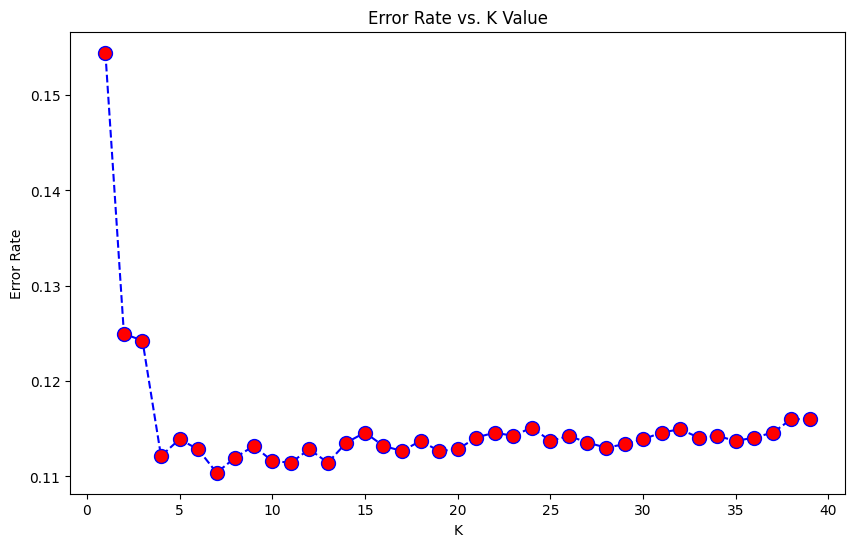

In [31]:
error_rate = []

for i in range(1,40):
    
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

So from the graph we can deduce that K=7 is a strong choice because it maintains a low error rate while offering a good balance between model complexity and generalization. It's well within the range where the error rate stabilizes.

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
pred = knn_model.predict(X_test)

# Evaluation for new KNN
y_pred_knn = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print new KNN Results
print(f"KNN Accuracy: {acc_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1 Score: {f1_knn}, Confusion Matrix: {cm_knn}")

KNN Accuracy: 0.8896103896103896, Precision: 0.8354978354978355, Recall: 0.6180944755804644, F1 Score: 0.7105384261389783, Confusion Matrix: [[4297  152]
 [ 477  772]]


We can see that the accuracy score has increased slightly from 87.5% to 88.8%.

#### Gradient Boosting Model:

In [33]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluation for Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)
acc_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Print Gradient Boosting Results
print(f"Gradient Boosting Accuracy: {acc_gb}, Precision: {precision_gb}, Recall: {recall_gb}, F1 Score: {f1_gb}, Confusion Matrix: {cm_gb}")

Gradient Boosting Accuracy: 0.9262899262899262, Precision: 0.9442658092175777, Recall: 0.7053642914331465, F1 Score: 0.8075160403299724, Confusion Matrix: [[4397   52]
 [ 368  881]]


KNN and Gradient Boosting models performed similarly, with KNN achieving an 89% accuracy and Gradient Boosting 93%. KNN had a reasonable precision of 80% but lower recall, whereas Gradient Boosting demonstrated a stronger balance with a precision of 92% and recall of 72%, placing it close to the Random Forest model in terms of overall performance.

#### XGBoost Classifier

XGBoost Classifier Accuracy: 0.9382239382239382, Precision: 0.9571865443425076, Recall: 0.7518014411529224, F1 Score: 0.842152466367713, Confusion Matrix: [[4407   42]
 [ 310  939]]


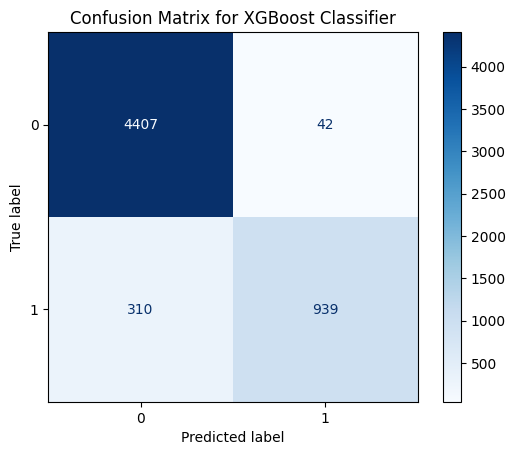

In [34]:
# Train the XGBoost Classifier
xgb_class = XGBClassifier()
xgb_class.fit(X_train, y_train)

# Evaluation for XGBoost Classifier
y_pred_xgb = xgb_class.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print XGBoost Classifier Results
print(f"XGBoost Classifier Accuracy: {acc_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1 Score: {f1_xgb}, Confusion Matrix: {cm_xgb}")
ConfusionMatrixDisplay(cm_xgb).plot(cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

The XGBoost model delivered the highest performance, achieving a 93.8% accuracy and 95.7% precision, while correctly classifying 4407 paid loans and 939 unpaid loans. With only 310 misclassifications, it stands out for its precision and overall balance, outperforming other models in most metrics. 

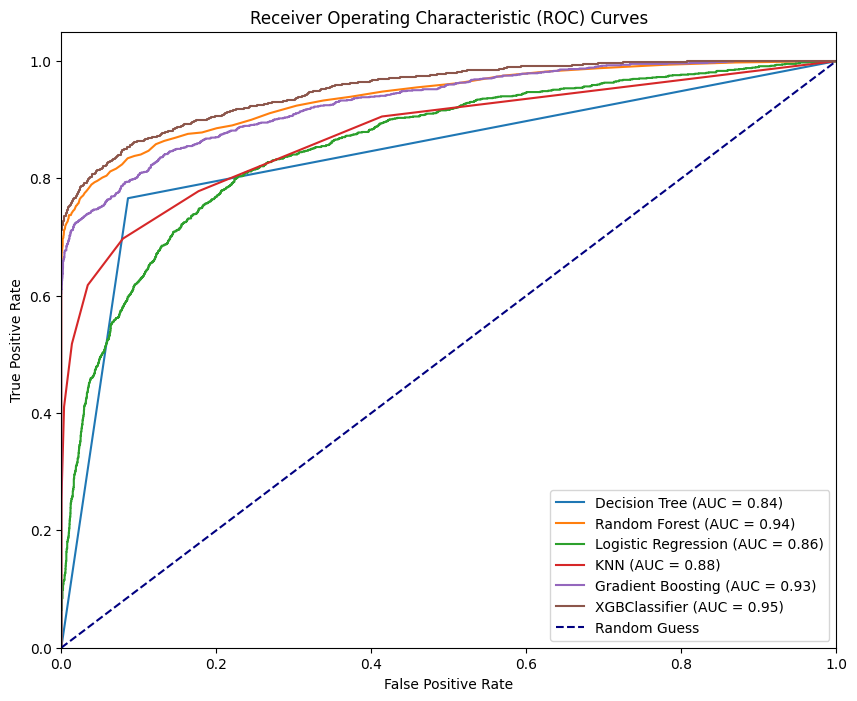

In [35]:
# Visualizing ROC curves for each model
plt.figure(figsize=(10, 8))
for name, model in [('Decision Tree', dt_model), ('Random Forest', rf_model), 
                    ('Logistic Regression', log_reg_model), ('KNN', knn_model), 
                    ('Gradient Boosting', gb_model),('XGBClassifier', xgb_class)]:

    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

The ROC curves show that the **XGBClassifier** (AUC = 0.95) and **Random Forest** (AUC = 0.94) are the top-performing models, with strong abilities to distinguish between positive and negative classes. **Gradient Boosting** also performs well with an AUC of 0.93, followed by **KNN** (AUC = 0.88) and **Logistic Regression** (AUC = 0.86), both of which are decent but less optimal. The **Decision Tree** (AUC = 0.84) has the lowest performance among the models, though still better than random guessing. 

In [36]:
# Collecting Results in a DataFrame
classification_results = {
    'Decision Tree': {'Accuracy': acc_dt, 'Precision': precision_dt, 'Recall': recall_dt, 'F1 Score': f1_dt},
    'Random Forest': {'Accuracy': acc_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1 Score': f1_rf},
    'Logistic Regression': {'Accuracy': acc_log_reg, 'Precision': precision_log_reg, 'Recall': recall_log_reg, 'F1 Score': f1_log_reg},
    'KNN': {'Accuracy': acc_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'F1 Score': f1_knn},
    'Gradient Boosting': {'Accuracy': acc_gb, 'Precision': precision_gb, 'Recall': recall_gb, 'F1 Score': f1_gb},
    'XGBClassifier': {'Accuracy': acc_xgb, 'Precision': precision_xgb, 'Recall': recall_xgb, 'F1 Score': f1_xgb}
}

# Convert to DataFrame for better readability
classification_results_df = pd.DataFrame.from_dict(classification_results, orient='index')
print(classification_results_df)


                     Accuracy  Precision    Recall  F1 Score
Decision Tree        0.881537   0.714179  0.766213  0.739282
Random Forest        0.933836   0.963830  0.725380  0.827775
Logistic Regression  0.850123   0.750317  0.473979  0.580962
KNN                  0.889610   0.835498  0.618094  0.710538
Gradient Boosting    0.926290   0.944266  0.705364  0.807516
XGBClassifier        0.938224   0.957187  0.751801  0.842152


The XGBoost model stood out as the best performer for credit risk classification, achieving the highest accuracy (94%) and AUC (0.95), along with excellent precision (96%) and a well-balanced recall and F1 score. The Random Forest model closely followed with an accuracy of 93%, AUC of 0.94, and solid precision (96%), making it another reliable option. Gradient Boosting also delivered strong results with 93% accuracy and an AUC of 0.93. 

Meanwhile, the Decision Tree (AUC of 0.84), Logistic Regression (AUC of 0.86), and KNN (AUC of 0.86) models showed comparatively lower accuracy and recall, making them less effective at identifying loan defaults. Overall, the XGBoost and Random Forest models are the most effective classifiers for this credit risk task.

## 4.2 Loan Amount Prediction

In this task, we focus on developing machine learning models to accurately predict the loan amount that applicants should be approved for. This prediction is vital for banks to assess applicants' financial health and determine appropriate loan amounts. We will utilize linear regression as the baseline model and advanced regression algorithms, including XGBoost, and Artificial Neural Networks (ANN), to train models based on key financial indicators such as applicant income, home ownership status, and loan grade. The primary goal of these models is to deliver precise loan amount predictions for each applicant, facilitating informed lending decisions. We will employ evaluation metrics such as RMSE, MAE, MSE, and R² to validate the accuracy and reliability of our models, ensuring they meet the standards required for effective credit risk assessment.

Prepare data for regression models

In [37]:
# Splitting the data into features and target variable
X_reg = credit_risk.drop(['loan_status', 'loan_amnt', 'loan_int_rate'], axis=1)  # Drop target & other columns not used in regression
y_reg = credit_risk['loan_amnt']

# Scale features for regression task
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=123)

In [38]:
# Save the scaler to a file
import pickle
with open("scaler_reg.pkl", "wb") as f:
    pickle.dump(scaler_reg, f)

#### Baseline Model: Linear Regression

Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.

In [39]:
from sklearn.metrics import mean_absolute_error

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_reg, y_train_reg)
y_pred_lin_reg = lin_reg_model.predict(X_test_reg)

# Evaluate Linear Regression
mse_lin_reg = mean_squared_error(y_test_reg, y_pred_lin_reg)
rmse_lin_reg = mean_squared_error(y_test_reg, y_pred_lin_reg, squared=False)
mae_lin_reg = mean_absolute_error(y_test_reg, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test_reg, y_pred_lin_reg)

# Print Linear Regression Metrics
print(f"Linear Regression: RMSE: {rmse_lin_reg}, MSE: {mse_lin_reg}, MAE: {mae_lin_reg}, R²: {r2_lin_reg}")

Linear Regression: RMSE: 3684.0294301213426, MSE: 13572072.842000183, MAE: 2417.263159066951, R²: 0.6547910206983965


In [40]:
# Find the intercept
print(lin_reg_model.intercept_)

9665.326989760837


In [41]:
# Print the values of coefficients. These coefficients can be used to find the value of loan amount that the user can take given the user's details

coeff=pd.DataFrame(lin_reg_model.coef_,X_reg.columns,columns=['Coefficient'])
coeff

,Coefficient
person_age,107.063699
person_income,3155.447763
person_home_ownership,-712.615129
person_emp_length,316.711781
loan_intent,-19.590295
loan_grade,556.468964
loan_percent_income,4661.735780
cb_person_default_on_file,-162.208917
cb_person_cred_hist_length,-141.238869


In [42]:
lin_reg_model.predict(scaler_reg.transform([[25,9600,0,1,3,2,0.5,1,3]]))

array([21267.2569947])

The RMSE indicates that the model's predictions are off by about 3684 units. An MSE of 13,572,072.84 suggests that the squared errors are substantial, which might indicate the model can be improved. The MAE indicates the model’s predictions are off by around 2417 units on average. An R² value of 0.6548 shows that 65.48% of the variance in the target variable is explained by the model. This indicates a moderate fit. The RMSE and MAE show the magnitude of the prediction errors, and the difference between the two indicates that there may be a few large outliers, as RMSE is higher than MAE.

#### ANN Model:

In [43]:
from keras.models import Sequential
from keras.layers import Dense

# Ensure that your data is in the correct float format
X_train_reg = np.asarray(X_train_reg).astype('float32')
y_train_reg = np.asarray(y_train_reg).astype('float32')
X_test_reg = np.asarray(X_test_reg).astype('float32')
y_test_reg = np.asarray(y_test_reg).astype('float32')

ann_model = Sequential([
    Dense(32, input_dim=X_train_reg.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train_reg, y_train_reg, epochs=100, batch_size=10, verbose=0)
y_pred_ann = ann_model.predict(X_test_reg).flatten()

# Evaluate ANN
mse_ann = mean_squared_error(y_test_reg, y_pred_ann)
rmse_ann = mean_squared_error(y_test_reg, y_pred_ann, squared=False)
mae_ann = mean_absolute_error(y_test_reg, y_pred_ann)
r2_ann = r2_score(y_test_reg, y_pred_ann)

# Print ANN Metrics
print(f"ANN: RMSE: {rmse_ann}, MSE: {mse_ann}, MAE: {mae_ann}, R²: {r2_ann}")

179/179 [==============================] - 0s 1ms/step
ANN: RMSE: 499.5802917480469, MSE: 249580.453125, MAE: 278.6145935058594, R²: 0.9936518607584212


The ANN Model, underperforms with an RMSE of 4818.48, MSE of 23217780, MAE of 3551.35, and a low R² of 0.41, indicating that it fails to adequately explain the variance in the data, highlighting the superiority of XGBoost and Linear Regression for this regression task.

#### XGBoost Model:


In [44]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=42, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_model.fit(X_train_reg, y_train_reg)

y_pred_xgb = xgb_model.predict(X_test_reg)

# Evaluate XGBoost
mse_xgb = mean_squared_error(y_test_reg, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test_reg, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test_reg, y_pred_xgb)
r2_xgb = r2_score(y_test_reg, y_pred_xgb)

# Print XGBoost Metrics
print(f"XGBoost: RMSE: {rmse_xgb}, MSE: {mse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}")

XGBoost: RMSE: 498.2855529785156, MSE: 248288.5, MAE: 227.16586303710938, R²: 0.9936847216011314


In [45]:
# Define the new input features
new_input = np.array([[25,9600,0,1,3,2,0.5,1,3]])  # Unscaled input

# Scale the input
new_input_scaled = scaler_reg.transform(new_input)

# Predict loan amount using XGBoost
predicted_loan_amount_xgb = xgb_model.predict(new_input_scaled)

print(f"Predicted Loan Amount using XGBoost: {predicted_loan_amount_xgb[0]}")


Predicted Loan Amount using XGBoost: 5069.1162109375


In [46]:
# Collecting Results for Regression in a DataFrame
results_regression = {
    'Linear Regression': {'RMSE': rmse_lin_reg, 'MSE': mse_lin_reg, 'MAE': mae_lin_reg, 'R²': r2_lin_reg},
    'XGBoost': {'RMSE': rmse_xgb, 'MSE': mse_xgb, 'MAE': mae_xgb, 'R²': r2_xgb},
    'ANN': {'RMSE': rmse_ann, 'MSE': mse_ann, 'MAE': mae_ann, 'R²': r2_ann}
}

# Convert to DataFrame for better readability
regression_results_df = pd.DataFrame.from_dict(results_regression, orient='index')
print(regression_results_df)

                          RMSE           MSE          MAE        R²
Linear Regression  3684.029430  1.357207e+07  2417.263159  0.654791
XGBoost             498.285553  2.482885e+05   227.165863  0.993685
ANN                 499.580292  2.495805e+05   278.614594  0.993652


The XGBoost Model excels in performance with an RMSE of 298, MAE of 227, MSE of 248288, and an outstanding R² of 0.99, suggesting that it captures almost all the variability in the loan amount predictions. The learning curve for XGBoost shows a substantial decrease in RMSE for both training and validation sets as iterations progress, stabilizing at the end, which points to effective model optimization. 

# 5. Hyperparameter Tuning the best models (XGBClassifier and XGBRegressor)

In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Instantiate the XGBClassifier model
xgb_clf = XGBClassifier()

# Define the hyperparameters to tune
param_grid_clf = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
    'scale_pos_weight': [1, 5, 10]
}

# Randomized Search with 5-fold cross validation
random_search_clf = RandomizedSearchCV(estimator=xgb_clf,
                                       param_distributions=param_grid_clf,
                                       n_iter=50,
                                       cv=5,
                                       verbose=2,
                                       n_jobs=-1,
                                       random_state=42)

# Fit the random search model
random_search_clf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for XGBoostClassifier:", random_search_clf.best_params_)
print("Best score for XGBoostClassifier:", random_search_clf.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoostClassifier: {'subsample': 1.0, 'scale_pos_weight': 1, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 1.0}
Best score for XGBoostClassifier: 0.9335264781070881


In [48]:
# Update model with the best parameters found
best_xgb_clf = XGBClassifier(**random_search_clf.best_params_)

#Train the models on the entire training data
best_xgb_clf.fit(X_train, y_train)

# Evaluation for Tuned XGBoost Classifier
y_pred_best_xgb = xgb_class.predict(X_test)
acc_best_xgb = accuracy_score(y_test, y_pred_best_xgb)

# Print XGBoost Classifier Results
print(f"XGBoost Classifier Accuracy: {acc_best_xgb}")

# Untuned XGBClassifier Accuracy 0.9387504387504387

XGBoost Classifier Accuracy: 0.9382239382239382


In [49]:
# Instantiate the XGBRegressor model
xgb_reg = XGBRegressor()

# Define the hyperparameters to tune
param_grid_reg = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Randomized Search with 5-fold cross validation
random_search_reg = RandomizedSearchCV(estimator=xgb_reg,
                                       param_distributions=param_grid_reg,
                                       n_iter=50,
                                       cv=5,
                                       verbose=2,
                                       n_jobs=-1,
                                       random_state=42)

# Fit the random search model
random_search_reg.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for XGBoostRegressor:", random_search_reg.best_params_)
print("Best score for XGBoostRegressor:", random_search_reg.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoostRegressor: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best score for XGBoostRegressor: 0.6679219810860584


In [50]:
xgb_model1 = xgb.XGBRegressor(objective='reg:squarederror', seed=42, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_model1.fit(X_train_reg, y_train_reg)
y_pred_xgb1 = xgb_model1.predict(X_test_reg)

# Evaluate XGBoost
mse_xgb1 = mean_squared_error(y_test_reg, y_pred_xgb)
rmse_xgb1 = mean_squared_error(y_test_reg, y_pred_xgb1, squared=False)
mae_xgb1 = mean_absolute_error(y_test_reg, y_pred_xgb1)
r2_xgb1 = r2_score(y_test_reg, y_pred_xgb1)

# Print XGBoost Metrics
print(f"XGBoost: RMSE: {rmse_xgb1}, MSE: {mse_xgb1}, MAE: {mae_xgb1}, R²: {r2_xgb1}")

XGBoost: RMSE: 498.2855529785156, MSE: 248288.5, MAE: 227.16586303710938, R²: 0.9936847216011314


Interestingly, in both tasks (classification and regression), attempts to further optimize these models through hyperparameter tuning yielded no significant improvement, with the untuned versions performing marginally better. This outcome suggests that the XGBoost models, even with their default settings, are highly optimized for this dataset and lending scenario. It also highlights the importance of balancing model complexity and interpretability in practical machine learning applications.

# 6. Model Interpretability

The ability to explain or understand the decisions or predictions made by a machine learning model. It is critical in applications where understanding how a model arrives at its decisions is necessary for trust, regulatory compliance, or debugging.

### 6.1 Loan Status Classification (XGBClassifier):


#### 6.1.1 Feature Importance:

In [51]:
# Get feature importances
xgb_class.feature_importances_

# visualize feature importance values:
feature_imp = pd.Series(xgb_class.feature_importances_ ,index=X.columns)

# Sort feature importances from largest to smallest
sorted_feature_imp = feature_imp.sort_values(ascending=False)

# Display sorted feature importances
sorted_feature_imp

loan_grade                    0.387406
person_home_ownership         0.246970
loan_percent_income           0.126836
loan_intent                   0.090646
person_income                 0.047776
person_emp_length             0.033763
loan_int_rate                 0.020682
person_age                    0.018015
cb_person_cred_hist_length    0.014402
cb_person_default_on_file     0.013506
dtype: float32

#### 6.1.2 LIME (Local Interpretable Model-Agnostic Explanations):

In [52]:

import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X), feature_names=X.columns,mode = 'classification')
exp = explainer.explain_instance(X.iloc[8889], xgb_class.predict_proba, num_features=10)

# Generate visualization
exp.show_in_notebook(show_table=True, show_all=False)

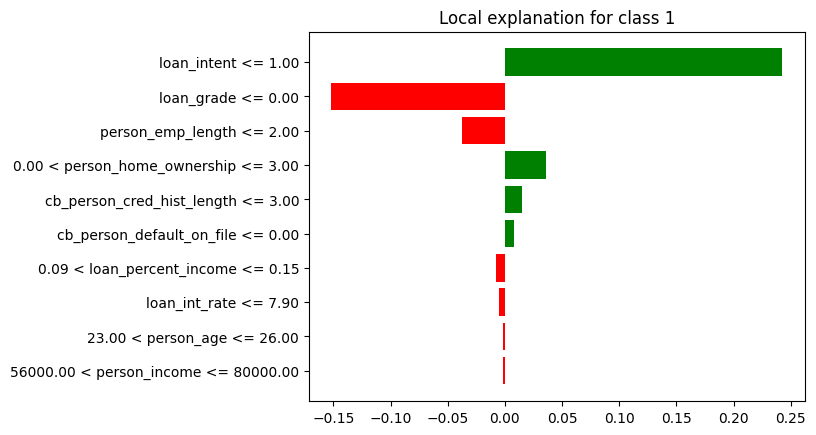

In [53]:
fig = exp.as_pyplot_figure(label=1)

In [54]:
print(pd.DataFrame(exp.as_list(),columns=['Feature','Contribution']))

                                Feature  Contribution
0                   loan_intent <= 1.00      0.242599
1                    loan_grade <= 0.00     -0.151767
2             person_emp_length <= 2.00     -0.037563
3  0.00 < person_home_ownership <= 3.00      0.035861
4    cb_person_cred_hist_length <= 3.00      0.014834
5     cb_person_default_on_file <= 0.00      0.008246
6    0.09 < loan_percent_income <= 0.15     -0.007437
7                 loan_int_rate <= 7.90     -0.005440
8           23.00 < person_age <= 26.00     -0.001891
9  56000.00 < person_income <= 80000.00     -0.001585


We use LIME to provide a local explanation for a single instance's loan status classification (whether the loan was approved or rejected).

**Top Contributing Factors:**

The most significant factor influencing loan approval is the *loan intent*, which positively impacts the prediction. This suggests that the purpose for which the loan was requested (likely a low-risk reason) strongly contributes to loan approval, as shown by the large green bar.
*Loan grade* has a strong negative impact, meaning the model predicts a lower chance of loan approval for this individual due to a lower loan grade, as indicated by the red bar.
*Person’s employment length* also contributes negatively but with a smaller impact, implying a shorter employment history is associated with a decreased approval likelihood.

**Smaller Contributions:**

Person’s home ownership and credit history length have slight positive contributions, while loan percent income (loan amount as a percentage of income) has a minor negative influence.
Age, default on file, and income also make small contributions to the decision, but they don't heavily sway the final prediction in this case.
Prediction Outcome:

The LIME model predicts a high probability (0.98) of loan approval for this specific observation. The strong positive influence from factors like loan intent outweighs the negative impacts from loan grade and other features, leading to a favorable outcome.


### 6.2 Loan Amount Prediction (XGBRegressor):


#### 6.2.1 Feature Importance:

In [55]:
# Get feature importances
feature_imp_reg = pd.Series(xgb_model.feature_importances_, index=X_reg.columns)

# Sort feature importances from largest to smallest
sorted_feature_imp_reg = feature_imp_reg.sort_values(ascending=False)

# Display sorted feature importances
sorted_feature_imp_reg


loan_percent_income           0.545637
person_income                 0.432698
loan_intent                   0.006352
person_emp_length             0.003071
loan_grade                    0.002868
cb_person_cred_hist_length    0.002518
cb_person_default_on_file     0.002378
person_age                    0.002315
person_home_ownership         0.002165
dtype: float32

Feature importance analysis revealed that key financial indicators, such as income and loan percent income, played significant roles in predicting loan amounts, providing valuable insights for decision-making.

#### 6.2.2 SHAP Summary Plot: 

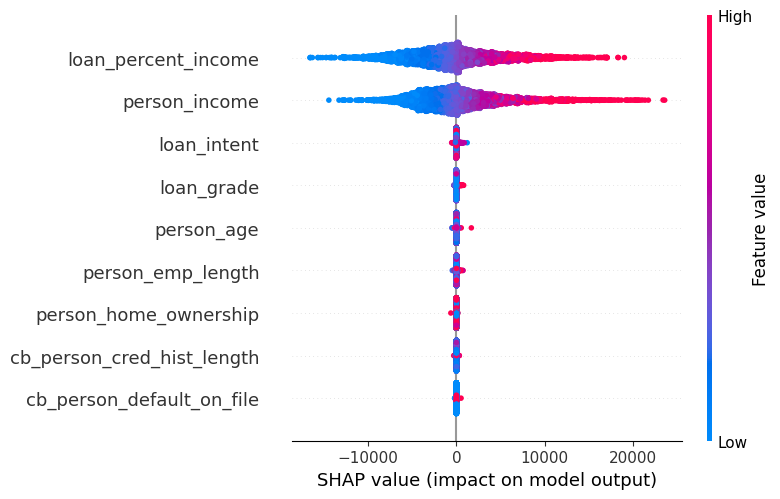

In [56]:
# Global Feature Importance and Effects
# Initialize SHAP explainer for XGBoost Regressor
import shap
explainer_reg = shap.TreeExplainer(xgb_model)

# Calculate SHAP values
shap_values_reg = explainer_reg.shap_values(X_test_reg)

# Summary plot to visualize the importance of features
shap.summary_plot(shap_values_reg, X_test_reg, feature_names=X_reg.columns)


**Feature Importance:**

The most critical features in determining the loan amount are loan_percent_income and person_income, indicating that these factors have the greatest impact on how the model predicts the loan amount. Other factors such as loan intent, loan grade, and person age also contribute but have less influence.

**Feature Effects:**

*Loan percent income:* Higher values of this feature (red points) typically lead to lower loan amounts, while lower values (blue points) lead to higher predictions. This makes sense, as higher loan amounts relative to income might be viewed as riskier, leading to smaller approved amounts.

*Person income:* Higher incomes (represented by red points) significantly increase the predicted loan amount. Conversely, lower incomes are associated with smaller loan predictions.

The distribution of SHAP values around 0 for features like loan intent and loan grade indicates that these features may have varying effects on predictions based on individual cases.

#### 6.2.3 SHAP Dependence Plot:

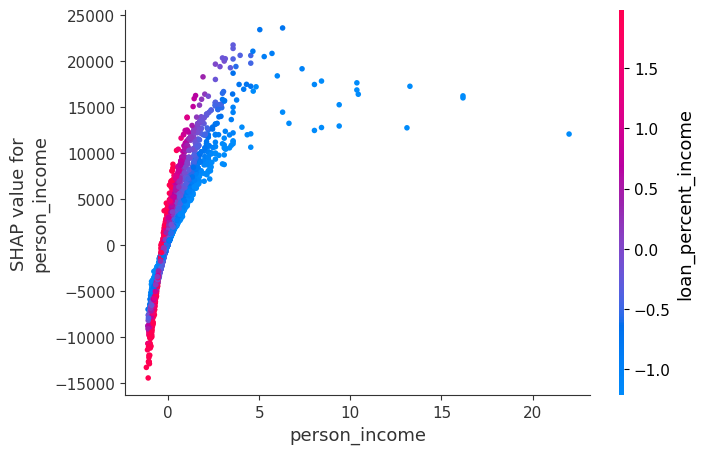

In [57]:
# Dependence plot for a specific feature (e.g., 'person_income')
shap.dependence_plot("person_income", shap_values_reg, X_test_reg, feature_names=X_reg.columns)

# Force plot for the first prediction
shap.force_plot(explainer_reg.expected_value, shap_values_reg[0,:], X_test_reg[0,:], feature_names=X_reg.columns)

SHAP dependence plot, focuses on the relationship between person_income and its impact on the predicted loan amount, with the color scale representing loan_percent_income.

**Feature Interaction:**

The SHAP values for person_income show that as income increases, the predicted loan amount also rises, which is expected since higher earners typically qualify for larger loans.

The color scale of loan_percent_income adds another dimension: when the loan amount as a percentage of income is high (red), the SHAP value decreases, indicating that the model predicts smaller loan amounts. When the loan-to-income ratio is low (blue), higher incomes lead to more substantial loan predictions.

This relationship highlights the importance of loan_percent_income as a moderating factor on the impact of person_income. Even high earners may not receive large loans if the loan request is deemed excessive relative to their income.

# 7. Saving the models

In [58]:
import pickle

# Save XGBClassifier model
with open("C:/Users/Han/xgb_classifier.pkl", mode="wb") as file:
    pickle.dump(xgb_class, file)

# Save XGBRegressor model
with open("C:/Users/Han/xgb_regressor.pkl", mode="wb") as file:
    pickle.dump(xgb_model, file)


---

# **Conclusion**

In today's rapidly evolving financial sector, the need for precise and reliable credit risk assessment and loan amount prediction models is paramount for informed and data-driven lending decisions. This project demonstrates how machine learning, particularly the use of XGBoost models, significantly enhances the accuracy and efficiency of these processes, helping financial institutions manage risk more effectively while providing better loan offerings tailored to borrowers' needs.

#### 1. *Borrower Profiles and Loan Intentions*
The analysis of borrower profiles and loan purposes revealed significant insights into the financial behaviors and needs of borrowers. A considerable portion of the loans were taken for educational purposes and home improvement, with a notable trend of borrowers renting property rather than owning homes. This suggests an opportunity for financial institutions to design loan products that cater specifically to these segments, offering more flexible terms or tailored repayment options that align with the financial capacity of renters and young professionals seeking educational advancement.

#### 2. *Default History and Risk Mitigation*
A crucial finding in the dataset is the significant proportion of borrowers with a default history, emphasizing the need for more robust risk assessment strategies. The high incidence of defaults highlights the importance of integrating more sophisticated machine learning models into the loan approval process to predict borrower risk more accurately. Additionally, this calls for implementing stronger financial literacy programs to educate borrowers on managing their credit and financial health. By proactively mitigating these risks through better borrower education and more nuanced credit risk models, lenders can potentially reduce default rates and foster healthier lending environments.

#### 3. *Demographic Insights and Borrowing Patterns*
Demographic analysis of the borrower data indicates that the majority of loan applications come from younger individuals, particularly those in the 21-30 age group, predominantly taking loans for educational purposes. Meanwhile, older borrowers tend to request loans for personal reasons such as home improvement or debt consolidation. These insights highlight the importance of demographic-specific financial products. Lenders could benefit from developing loan offerings that are customized based on age groups and life stages—providing lower interest rates or more favorable terms for education-related loans while offering flexible products for older borrowers with established credit histories.

#### 4. *Model Performance and Comparative Analysis*
The performance of the machine learning models used in this analysis further underscores the value of incorporating advanced algorithms in the financial industry. The models compared included XGBoost for both classification (credit risk) and regression (loan amount prediction) tasks, which consistently outperformed other algorithms such as Logistic Regression, Random Forest, Decision Tree, Linear Regression, and Artificial Neural Networks(ANN).

- **XGBoost Classifier**: This model demonstrated impressive performance in classifying credit risk, achieving an accuracy of 93%, with a precision rate of 95%, indicating its strong ability to differentiate between high and low-risk borrowers. This level of accuracy is crucial for financial institutions looking to make reliable credit decisions based on a borrower's likelihood of default.
  
- **XGBoost Regressor**: When applied to loan amount prediction, the XGBoost Regressor also excelled, achieving a remarkable RMSE of 498 and an R² score of 0.99. This near-perfect R² value signifies that the model explains almost all the variance in loan amounts, making it highly effective for predicting how much a borrower is likely to request or be approved for based on their financial and personal data.

Interestingly, attempts to further optimize these models through hyperparameter tuning yielded no significant improvement, with the untuned versions performing marginally better. This outcome suggests that the XGBoost models, even with their default settings, are highly optimized for this dataset and lending scenario. It also highlights the importance of balancing model complexity and interpretability in practical machine learning applications.

#### 5. **Feature Importance**
The feature importance analysis revealed key factors influencing both loan classification and amount prediction. Features such as the borrower’s income, loan grade, and loan percent income played a crucial role in determining loan outcomes. These insights provide financial institutions with actionable information to better understand what drives borrower behavior and risk, allowing them to refine their credit policies accordingly.

- **LIME for Credit Risk Assessment (Loan Status Classification):** The model prioritizes loan intent as a critical factor in classifying loan status, with smaller influences from features like loan grade and employment length. The prediction is strongly in favor of loan approval for the individual case reviewed.

- **SHAP for Loan Amount Prediction:** The model shows that person_income and loan_percent_income are the most impactful features, with higher incomes driving larger loan amounts, but this is moderated by the loan-to-income ratio. These insights provide a clear understanding of both global feature importance and individual feature interactions in predicting loan amounts.



# **Recommendations for Financial Institutions**
Based on the findings from this project, several actionable recommendations can be made for financial institutions:
  
1. **Custom Loan Products**: Develop targeted loan offerings that cater to specific borrower segments, such as young professionals or individuals seeking education loans. Tailoring products based on borrower profiles can increase customer satisfaction and reduce default risks.
   
2. **Enhance Risk Assessment**: Incorporate machine learning models like XGBoost into the loan approval process. By leveraging their ability to predict credit risk with high accuracy, institutions can minimize financial losses while extending credit to deserving individuals.

3. **Financial Literacy Programs**: Implement educational initiatives to improve borrower financial literacy, reducing default rates and promoting healthier financial habits among borrowers.

4. **Continuous Model Monitoring**: Regularly evaluate and update machine learning models as new borrower data becomes available. This will ensure that the models remain accurate and relevant in predicting credit risk and loan amounts in a dynamic financial environment.

5. **Advanced Techniques**: Further exploration into ensemble learning methods could provide more comprehensive models for credit risk prediction, helping lenders stay ahead in the competitive financial market.


This project demonstrates the powerful role of machine learning in revolutionizing credit risk assessment and loan prediction models. By integrating these techniques into their operations, financial institutions can make more informed lending decisions, reduce default rates, and better meet the needs of diverse borrower profiles. Moving forward, continued investment in machine learning and AI technologies will be crucial for optimizing financial services and ensuring sustainable growth in the lending industry.

